# T0 Introducción al aprendizaje automático

# Índice

1. [Qué es aprendizaje automático?](#1-qué-es-aprendizaje-automático)
2. [Aprendizaje supervisado](#2-aprendizaje-supervisado)
3. [Clasificación](#3-clasificación)
    * Ejemplo: clasificación de flores iris
    * Análisis exploratorio de datos
    * Aprendizaje de un clasificador
    * Minimización del riesgo empírico
    * Incertidumbre: modelos probabilísticos
    * Estimación por máxima verosimilitud
4. [Aprendizaje no supervisado](#4-aprendizaje-no-supervisado)
5. [Aprendizaje por refuerzo](#5-aprendizaje-por-refuerzo)
6. [El aprendizaje automático y otras áreas](#6-el-aprendizaje-automático-y-otras-áreas)
7. [Otras consideraciones](#7-otras-consideraciones)

# 1. Qué es aprendizaje automático?

**Arthur Samuel (1959):** $\;$ campo de estudio que da a los ordenadores la habilidad de aprender sin ser explícitamente programados

**Tom Mitchell (1997):** $\;$ un sistema aprende de la experiencia E respecto a una clase de tareas T y una medida de rendimiento R, si su rendimiento en T, medido por R, mejora con E

**Kevin Murphy (2022):**
* Hay muchos tipos de ML según Mitchell, dependiendo de la naturaleza de T, R y E
* Los tipos usuales de ML pueden tratarse convenientemente desde una perspectiva probabilística (estadística)
* La aproximación probabilística es óptima para la toma de decisiones bajo incertidumbre y enmarca formalmente el ML junto con otras muchas áreas científicas e ingenieras

# 2. Aprendizaje supervisado

**Aprendizaje supervisado:** $\;$ forma de ML más común

**Tarea T:** $\;$ consiste en aprender una transformación $f:\mathcal{X}\to\mathcal{Y}$ donde
* **Entradas $\boldsymbol{x}\in\mathcal{X}$:** $\;$ suelen ser un vector de $D$ características reales $\mathcal{X}=\mathbb{R}^D$
* **Salidas $\boldsymbol{y}\in\mathcal{Y}$:** $\;$ suelen ser etiquetas de clase (**clasificación**) o reales (**regresión**)

**Experiencia E:** $\;$ dada por un **conjunto de entrenamiento** $\,\mathcal{D}=\{(\boldsymbol{x}_n,\boldsymbol{y}_n)\}_{n=1}^N$
* $N$ es el **tamaño de la muestra**
* También es usual referirnos a cada par $(\boldsymbol{x}_n,\boldsymbol{y}_n)$ como **muestra (de entrenamiento)**

**Medida de rendimiento P:** $\;$ depende del tipo de salida

# 3. Clasificación

**Problema de clasificación:** $\;$ el espacio de salida es un conjunto de $C$ **etiquetas de clase,** $\;\mathcal{Y}=\{1,2,\dotsc,C\}$

**Reconocimiento de formas (pattern recognition):** $\;$ predicción de la etiqueta de clase de una entrada dada

**Clasificación binaria:** $\;$ caso particular en el cual solo tenemos dos clases, $\,y\in\{0,1\}\,$ o $\,y\in\{-1,+1\}$

## Ejemplo: clasificación de flores iris

**Clasificación de flores iris de las especies setosa, versicolor y virgínica:** $\;$ ejemplo clásico en clasificación estadística 

<center>

| Setosa                      | Versicolor                      | Virgínica                      |
| --------------------------- | ------------------------------- | ------------------------------ |
| <img src="Figure_1.1_A.png" width="150"/> | <img src="Figure_1.1_B.png" width="150"/> | <img src="Figure_1.1_C.png" width="150"/> |

</center>

**Espacio de entrada:** $\;\mathcal{X}$ es un conjunto de imágenes que, en general, es de dimensión muy elevada
* *Ejemplo:* $\;\mathcal{X}=\mathbb{R}^D$ con $D=C\times D_1\times D_2\,$ para una imagen a color con $C=3$ canales y $D_1\times D_2$ píxeles
* **Aprendizaje de $f:\mathcal{X}\to\mathcal{Y}$:** $\,$ es muy difícil, aunque ciertos modelos avanzados consiguen aprender $f$ en algunas tareas

**Conocimiento a priori:** $\;$ conocimiento previo sobre la tarea que permite simplificarla
* **Iris:** la longitud y anchura de sépalos y pétalos es altamente discriminativa, por lo cual podemos trabajar con un espacio de entrada de dimensión mucho más reducida que el de las imágenes originales, $\mathcal{X}=\mathbb{R}^4$

**Datos tabulados o matriz de datos:** $\;$ matriz de $N$ datos ($N$ filas) y $D$ características junto con las etiquetas de clase ($D+1$ columnas)

**Corpus iris:** $\;$ matriz de $N=150$ muestras descritas con $D=4$ características junto con las etiquetas de clase ($50$ por clase)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = pd.Series(iris.target_names[iris.target], dtype='category')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Análisis exploratorio de datos

**Análisis exploratorio de datos:** $\;$ estudio preliminar de los datos de un problema de ML para familiarizarse con el mismo
* **Detección de patrones obvios en los datos:** $\;$ si hay, para hacerse una idea de la dificultad del problema y, en definitiva, de qué resultados podemos esperar con diferentes métodos (p.e. lineales o no)
* **Detección de problemas obvios con los datos:**
* **Outliers:** $\;$ datos con características o etiquetas **perdidas** o **incorrectas** (p.e. por encontrarse fuera de dominio)
* **Label noise (etiquetas dudosas):** $\;$ datos con etiquetas de clase que no están claras

**Inspección visual:** $\;$ análisis exploratorio de datos mediante representación gráfica de las mismas (si $D$ es reducida)
* **Gráfico de pares (pair plot):** $\;$ matriz de $D\times D$ gráficos para características individuales (en la diagonal) y a pares (fuera)

**Ejemplo:** $\;$ gráfico de pares para iris; setosa se separa linealmente; setosa y virgínica también se separan bastante bien

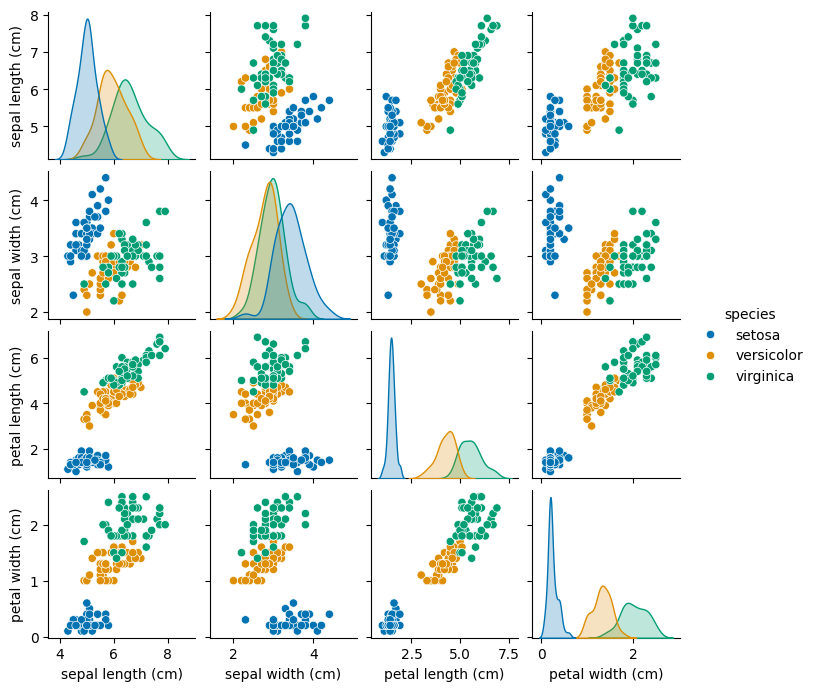

In [2]:
import seaborn as sns; import warnings; warnings.filterwarnings("ignore")
sns.pairplot(data, hue="species", height = 1.75, palette = 'colorblind');

## Aprendizaje de un clasificador

**Aprendizaje de un clasificador o regla de decisión $\,f(\boldsymbol{x};\boldsymbol{\theta})$:** $\;$ suele reducirse a escoger un valor para el $\boldsymbol{\theta}$ que lo gobierna

**Efecto de un clasificador:** $\;$ particiona el espacio de entrada en **regiones de decisión** separadas por **fronteras de decisión**

**Ejemplo:** regla de decisión sencilla para distinguir setosa de no-setosa en iris en uso de la longitud de pétalos ($x$)
$$f(\boldsymbol{x};\boldsymbol{\theta})=\left\{\begin{array}{l}%
\text{setosa si $x\leq 2.45$}\\
\text{versicolor o virgínica si no}
\end{array}\right.$$
En esta regla tenemos parámetros $\,\boldsymbol{\theta}=(2.45),\,$ frontera $\,x=2.45\,$, y regiones $\,\mathcal{R}_{\text{setosa}}=\{x\leq 2.45\}\,$ y $\,\mathcal{R}_{\text{no-setosa}}=\{x>2.45\}$

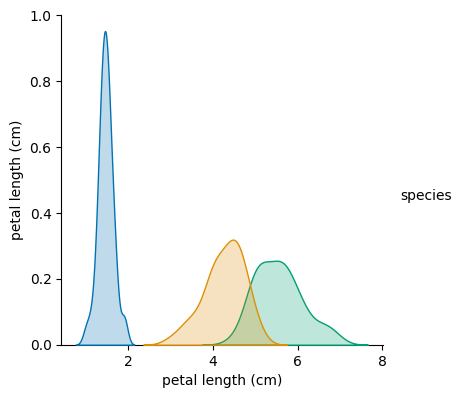

In [3]:
sns.pairplot(data, vars = data.columns[2:3], hue="species", height = 4, palette = 'colorblind');

**Ejemplo (cont.):** refinamiento de la regla anterior mediante partición recursiva de regiones para construir un **árbol de decisión;** solo añadimos una sub-regla para particionar la región no-setosa en versicolor y virgínica según la anchura de pétalos

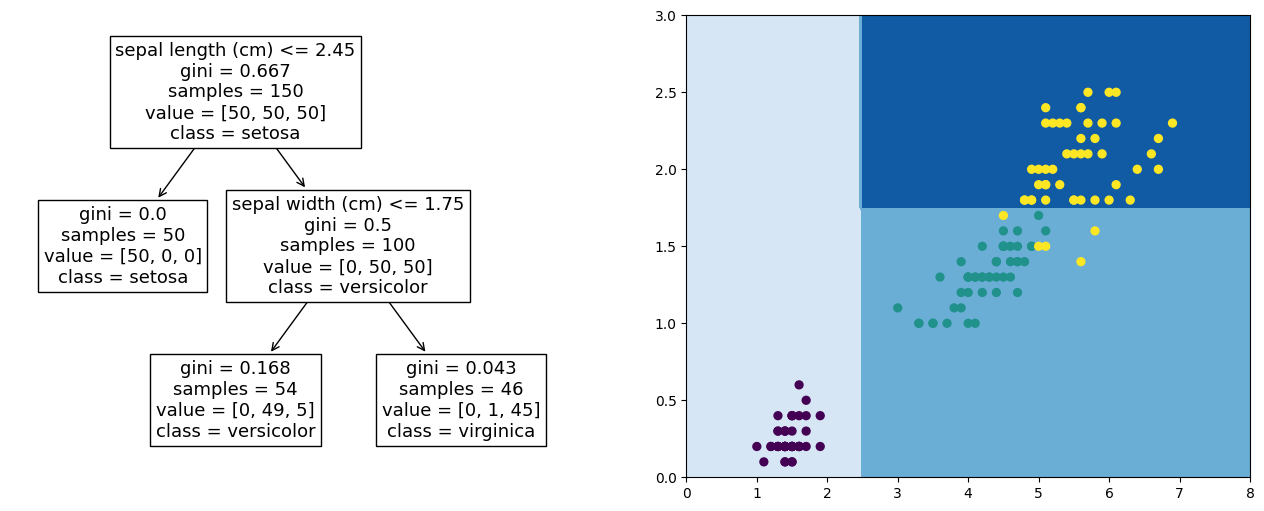

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = iris.data[:, [2, 3]]; y = iris.target
dt = DecisionTreeClassifier(max_depth=2, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_tree(dt, feature_names=iris.feature_names, class_names=list(iris.target_names), ax=axes[0], fontsize=13);
xx, yy = np.meshgrid(np.linspace(0, 8, num=100), np.linspace(0, 3, num=100))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); axes[1].scatter(*X.T, c=y, s=32);

## Minimización del riesgo empírico

**Tasa de error (en entrenamiento):** $\;$ medida de rendimiento obvia para aprender el $\boldsymbol{\theta}$ de un clasificador
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_{n=1}^N\mathbb{Y}(y_n\neq f(\boldsymbol{x}_n;\boldsymbol{\theta}))
\quad\text{con}\quad%
\mathbb{Y}(\text{cierto})=1,\;\mathbb{Y}(\text{falso})=0$$

**Riesgo empírico:** $\;$ generaliza la tasa de error mediante la introducción de una **función de pérdida** $\ell(y,\hat{y})$ para medir la pérdida (coste) producida al clasificar una muestra de la clase $y$ en la clase $\hat{y}$
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_ {n=1}^N\ell(y_n, f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$

**Pérdida 01:** $\;\ell_{01}(y,\hat{y})=\mathbb{Y}(y\neq\hat{y})$, particulariza el riesgo empírico a la tasa de error

**Funciones de pérdida usuales:** $\;$ se usan pérdidas parecidas a la 01, aunque no la 01 exactamente, para facilitar el aprendizaje

**Minimización del riesgo empírico:** $\;$ es la aproximación básica a **el entrenamiento o ajuste del modelo**
$$\hat{\boldsymbol{\theta}}=\operatorname*{argmin}_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta})=\operatorname*{argmin}_{\boldsymbol{\theta}} \frac{1}{N}\sum_{n=1}^N\ell(y_n,f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$

**Generalización óptima:** $\;$ en realidad el verdadero objetivo consiste en minimizar la pérdida esperada sobre datos futuros todavía no vistos, esto es, queremos que el modelo generalice lo mejor posible, no que simplemente funcione bien con los datos de entrenamiento

## Incertidumbre: modelos probabilísticos

**Imposibilidad de aprender clasificadores libres de error:** $\;$ a causa de la incertidumbre de modelo y datos

**Modelo probabilístico:** $\;$ para predecir una distribución de probabilidad sobre las clases en vez de una sola clase
$$p(y=c\mid \boldsymbol{x}; \boldsymbol{\theta})=f_c(\boldsymbol{x}; \boldsymbol{\theta})%
\qquad\text{donde}\qquad%
f:\mathcal{X}\to[0, 1]^C, \quad 0\leq f_c\leq 1, \quad \sum_c f_c=1$$ 

## Estimación por máxima verosimilitud

**Log-pérdida o neg-log-probabilidad:** $\;$ función de pérdida usual para el ajuste de modelos probabilísticos
$$\ell(y, f(\boldsymbol{x}; \boldsymbol{\theta}))=-\log p(y\mid f(\boldsymbol{x}; \boldsymbol{\theta}))$$
* Si el modelo asigna probabilidad $1$ en la clase correcta, la pérdida es nula;
* Si no, la pérdida será positiva y será más grande cuando menor sea la probabilidad asignada en la clase correcta

**Neg-log-verosimilitud (NLL):** $\;$ riesgo empírico con log-pérdida
$$\operatorname{NLL}(\boldsymbol{\theta})%
=-\frac{1}{N}\sum_n \log p(y_n\mid f(\boldsymbol{x}_n; \boldsymbol{\theta}))$$

**Estimador màximo-verosímil (MLE):** $\;$ vector de parámetros que minimiza la NLL
$$\hat{\boldsymbol{\theta}}_{\text{mle}}%
=\operatorname*{argmin}_{\boldsymbol{\theta}}\;\operatorname{NLL}(\boldsymbol{\theta})$$
* El MLE se utiliza muy frecuentemente para ajustar modelos a partir de datos de entrenamiento

**Ejemplo:** $\;$ modelo probabilístico sencillo (**regresión logística**) para iris usando la longitud y anchura de pétalos; después de su ajuste por máxima verosimilitud, clasificamos cada entrada posible en la clase de mayor probabilidad según el modelo

W= [[ 11.12767979   3.22717485 -14.35485463]
 [ -2.74866104   0.08356447   2.66509657]
 [ -1.16890756  -0.90803047   2.07693804]]


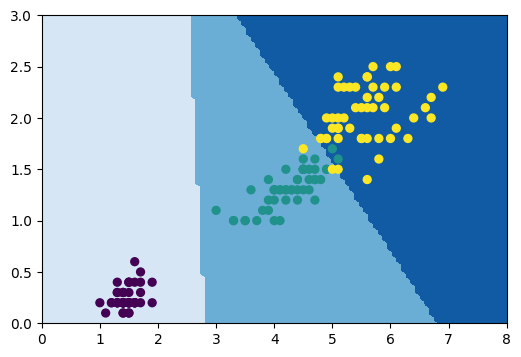

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X = iris.data[:, [2, 3]]; y = iris.target
rl = LogisticRegression().fit(X, y)
print("W=", np.vstack((rl.intercept_, rl.coef_.T)))
fig = plt.figure(figsize=(6, 4))
xx, yy = np.meshgrid(np.linspace(0, 8, num=100), np.linspace(0, 3, num=100))
Z = rl.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cp = plt.contourf(xx, yy, Z, 2, cmap='Blues'); plt.scatter(*X.T, c=y, s=32);

# 4. Aprendizaje no supervisado

**Aprendizaje no supervisado:** $\;$ trata "de explicar" los datos cuando solo tenemos un conjunto "de entradas", $\mathcal{D}=\{\boldsymbol{x}_n\}_{n=1}^N$, sin sus correspondientes "salidas" $\{\boldsymbol{y}_n\}$

**Aproximación probabilística:** $\;$ ajusta uno modelo incondicional $p(\boldsymbol{x})$, en vez de un condicional $p(\boldsymbol{y}\mid\boldsymbol{x})$ como en aprendizaje supervisado

**Mayor aplicabilidad:** $\;$ del aprendizaje no supervisado que el supervisado
* Se debe a que los datos no supervisados son fáciles de conseguir; no así la supervisión
* Además, el aprendizaje no supervisado puede aplicarse a tareas mal definidas, puesto que en principio no requiere disponer de un conjunto de categorías dado, ni siquiera asumir que los datos se agrupan en un cierto número de categorías dado

## Clustering

**Clustering:** $\:$ área clásica del análisis exploratorio de datos con el objetivo de encontrar **agrupamientos naturales** de los datos en grupos homogéneos o **clústeres**

**Ejemplo:** $\;$ clustering de iris según longitud y anchura de pétalos

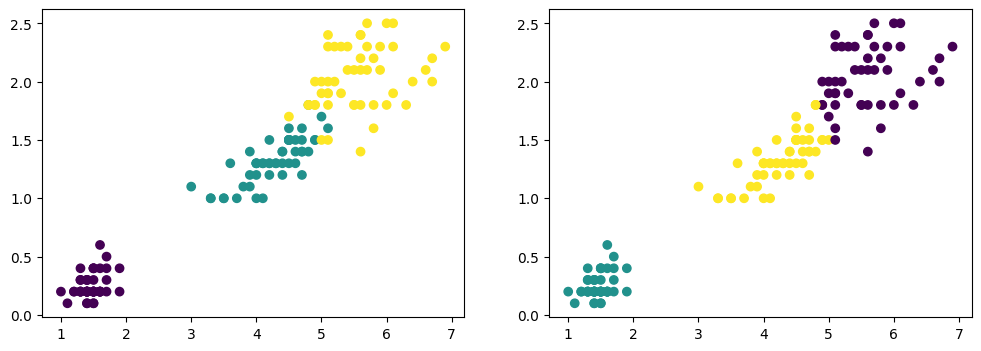

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
iris = load_iris(); X = iris.data[:, [2, 3]]; y = iris.target
K = 3 # <<< elige número de clústers
y_pred = KMeans(n_clusters=K, n_init=1, random_state=42).fit(X).predict(X)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(*X.T, c=y); axes[1].scatter(*X.T, c=y_pred);

# 5. Aprendizaje por refuerzo

**Aprendizaje por refuerzo (RL, reinforcement learning):** $\;$ el sistema o **agente** interacciona con su entorno mediante una **política** $\boldsymbol{a}=\pi(\boldsymbol{x})$ que especifica qué acción tomar en respuesta en cada entrada posible $\boldsymbol{x}$ (derivada del estado del entorno)
* **También llamado learning with a critic:** $\;$ por comparación con **el aprendizaje supervisado** o **learning with a teacher,** puesto que al sistema no se le enseña la acción óptima a tomar en cada paso, sino que recibe una **recompensa (o castigo)** ocasional en respuesta a las acciones que toma
* *Ejemplos:* $\;$ movimiento de la nave en Space Invaders o el control motor de un robot que debe de realizar cierta tarea

**Gran aplicabilidad y dificultad:** $\;$ aunque es muy popular por su gran aplicabilidad, es muy difícil puesto que la recompensa solo se obtiene ocasionalmente y el agente puede no conocer cúal de sus múltiples acciones lo originaron

# 6. El aprendizaje automático y otras áreas

**Análisis predictivo (predictive analytics):** $\;$ similar al ML, se centra en aplicaciones de negocios como la administración de relaciones con el cliente, análisis de cobros y predicción de cartera

**Minería de datos:** $\;$ cubre tanto el aprendizaje supervisado como no supervisado, pero se orienta a bases de datos (estructuradas)

**Ciencia de datos:** $\;$ emplea técnicas de ML y estadística, pero desde una óptica más estadística, haciendo énfasis en la integración y visualización de datos, así como en el papel del analista de datos y el análisis experto del dominio

**IA simbólica:** $\;$ basada en la lógica, el procesamiento de listas simbólicas y el conocimiento experto; decayó en los 90, la **IA moderna** es sinónimo de ML y redes neuronales

**Bases del ML:** $\;$ probabilidad, estadística, teorías de la decisión e información, algebra lineal y optimización

# 7. Otras consideraciones

**Problema del alineamiento:** $\;$ discrepancia entre lo que pedimos a nuestros algoritmos que optimicen y lo que en realidad queremos que hagan por nosotros

**Ética y seguridad de la IA:** $\;$ el extraordinario avance de la IA en los últimos años ha provocado gran preocupación tanto por la eticidad de los sistemas desarrollados (lo que queremos que hagan y posibles usos) como por su seguridad (lo que realmente les hemos pedido y usos no deseados)

**Inteligencia artificial general (AGI, artificial general intelligence):** $\;$ la visión clásica de la IA establece que llegaremos a sistemas AGI mediante el desarrollo de sistemas cada vez más avanzados, que tomen decisiones por su cuenta, sin intervención humana

**Inteligencia aumentada:** $\;$ visión alternativa de la IA según la cual los sistemas IA son herramientas inteligentes que mantienen el control humano en la toma de decisiones; aunque las herramientas IA sean cada vez más autònomas, el objetivo es facilitar el trabajo de las personas, no emularlas o superarlas

**Regulación de la IA:** $\;$ desde junio de 2023, el uso de la IA en la UE está regulado por la Ley de Inteligencia Artificial, la cual establece obligaciones para proveedores y usuarios en función del nivel de riesgo de la IA (inaceptable, alto y limitado)